# Data Analyst jobs in Europe | September 2022 

<div style="border:solid grey 1.5px">

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Job-title" data-toc-modified-id="Job-title-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Job title</a></span></li><li><span><a href="#Getting-the-link" data-toc-modified-id="Getting-the-link-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Getting the link</a></span></li><li><span><a href="#Location" data-toc-modified-id="Location-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Location</a></span></li><li><span><a href="#Number-of-applicants" data-toc-modified-id="Number-of-applicants-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Number of applicants</a></span></li><li><span><a href="#Company-name" data-toc-modified-id="Company-name-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Company name</a></span></li><li><span><a href="#Level-and-time" data-toc-modified-id="Level-and-time-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Level and time</a></span></li><li><span><a href="#Type" data-toc-modified-id="Type-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Type</a></span></li><li><span><a href="#Company-size" data-toc-modified-id="Company-size-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Company size</a></span></li><li><span><a href="#Getting-the-field" data-toc-modified-id="Getting-the-field-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Getting the field</a></span></li><li><span><a href="#Date" data-toc-modified-id="Date-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Description" data-toc-modified-id="Description-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Skills" data-toc-modified-id="Skills-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Skills</a></span></li><li><span><a href="#Preparation-for-visualisation" data-toc-modified-id="Preparation-for-visualisation-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Preparation for visualisation</a></span></li><li><span><a href="#Export-of-csv-file" data-toc-modified-id="Export-of-csv-file-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Export of csv file</a></span></li></ul></div>

<div style="border:solid grey 1.5px">

# Introduction

The goal of this project is to visualize data about `Data Analyst/BI Analyst` jobs in Europe.
We take into concideration Entry Level jobs posted on LinkedIn during one week in September 2022.

Csv-file with data parsed from LinkedIn is used as a sourse.

<div style="border:solid grey 1.5px">

# Final dashboard preview

**[For interactve version please click here](https://public.tableau.com/shared/DDHHBFGTR?:display_count=n&:origin=viz_share_link)**

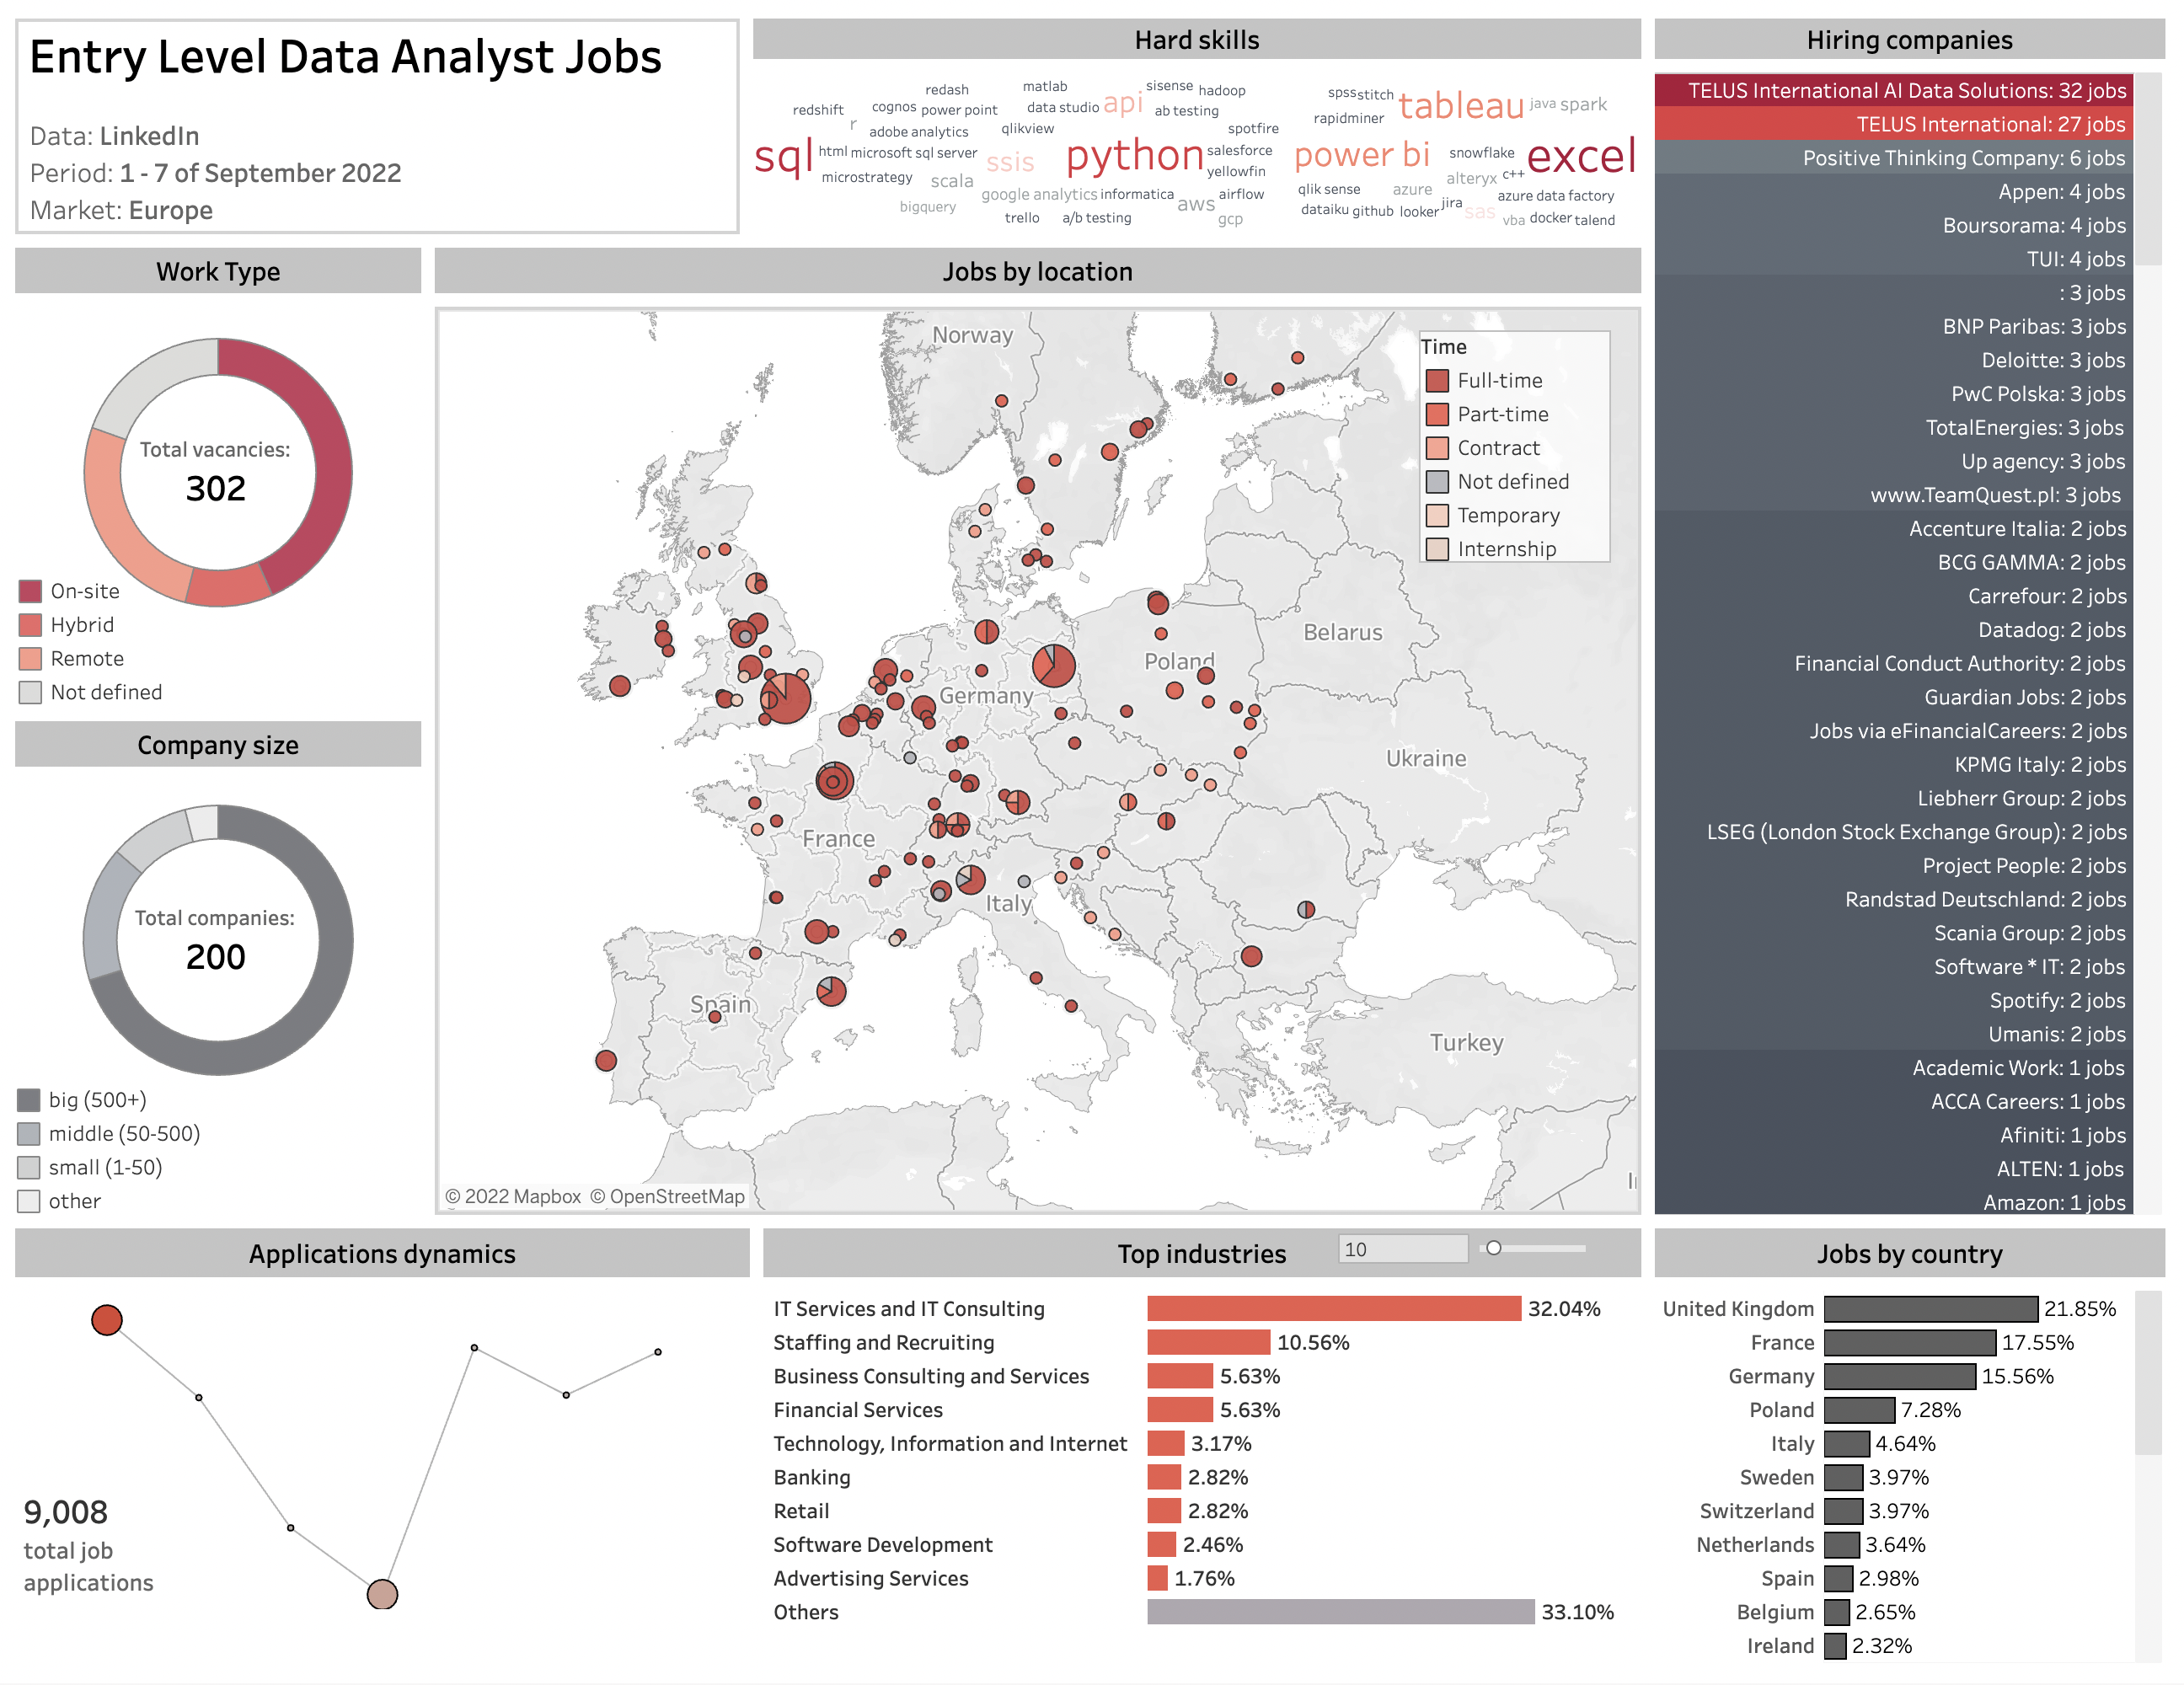

<div style="border:solid grey 1.5px">

# Extracting the data

### Preparation

Downloading necessary libraries and setting up the workspace:

In [29]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import timedelta
import re
import io

Downloading the `.csv` file from GitHub repository and checking what's inside:

In [121]:
url = "https://raw.githubusercontent.com/yanakoyo/da_job_market_for_data_analysts/main/masterskaya_yandex_2022_09_07.csv"

download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [122]:
df.head()

,Unnamed: 0,html
0,0,"\n <div>\n <div class=""\n jobs-deta..."
1,1,"\n <div>\n <div class=""\n jobs-deta..."
2,2,"\n <div>\n <div class=""\n jobs-deta..."
3,3,"\n <div>\n <div class=""\n jobs-deta..."
4,4,"\n <div>\n <div class=""\n jobs-deta..."


Let's see the content of one cell in `html` column:

In [32]:
df['html'][55][:500]

'\n  <div>\n    <div class="\n        jobs-details__main-content jobs-details__main-content--single-pane full-width\n        ">\n        \n<!---->\n      \n<!---->\n      <div>\n        <div class="jobs-unified-top-card t-14">\n  <div class="relative">\n\n    <div class="jobs-unified-top-card__content--two-pane">\n<!---->\n        <a href="/jobs/view/3255876665/?alternateChannel=search&amp;refId=yH2C6IIsgieiiXwBpe7xWg%3D%3D&amp;trackingId=jsZrxd%2BGW1A2E4cm1Y3Qpw%3D%3D&amp;trk=d_flagship3_search_srp_jobs" id="e'

Each cell contains a full html code of a webpage with one job position on it. We will use this code to extract the information we need.

### Job title

First of all we will extract the job titles using `BeautifulSoup` library:

In [33]:
df['title'] = df['html'].apply(lambda x:  BeautifulSoup(x).find('h2').text.strip())

In [34]:
df.sample(12, random_state=188)

,html,title
405,"\n <div>\n <div class=""\n jobs-deta...",Data Engineer junior | MedTech
342,"\n <div>\n <div class=""\n jobs-deta...",Online Data Analyst
551,"\n <div>\n <div class=""\n jobs-deta...",Sample Management Data Analyst
386,"\n <div>\n <div class=""\n jobs-deta...",Internet Analyst | Greater Turin Metropolitan ...
160,"\n <div>\n <div class=""\n jobs-deta...",STAGE - DEVELOPPEUR FULLSTACK- Direction IT EX...
182,"\n <div>\n <div class=""\n jobs-deta...",Data Engineer for Business Intelligence/ Data ...
556,"\n <div>\n <div class=""\n jobs-deta...",Développeur Python Back-end
607,"\n <div>\n <div class=""\n jobs-deta...",Interim HR Data Analyst
425,"\n <div>\n <div class=""\n jobs-deta...",Data Analyst
255,"\n <div>\n <div class=""\n jobs-deta...",Data Analyst


In [35]:
print('Total jobs in current dataset:', df.shape[0])

Total jobs in current dataset: 772


We got the titles and we can see from the sample above that not all of them are relevant. `Data Engineer` and `Développeur` (`Developper`) should not be in our final results.

In [36]:
df['title'].unique()[:15]

array(['Stage - Assistant Ingénieur Qualité - Beyrand (H/F)',
       'développeur matlab/simulink, secteur automobile f/h',
       'Online Data Analyst', 'Online Data Analyst - Belgium',
       'Data Analyst', 'Alternant/ Alternante data analyst M/F',
       'Alternant(e) Data Scientist (H/F)',
       'ALTERNANCE- TOTALENERGIES RENEWABLES - Data Engineer (H/F)',
       'Data Engineer (with Python)', 'Junior Test Analyst',
       'Data Analyst H/F',
       'Data Scientist e-Commerce & Acquisition Monétique',
       'Ingénieur de recherche en traitement de données de mobilité H/F',
       'INGENIERO/A PRODUCTO Y CALIDAD AUTOMOCIÓN',
       'Data Scientist - Experience'], dtype=object)

In [37]:
df['title'] = df['title'].str.upper()

We can already filter the jobs that don't match our expectations based on their titles. We will keep all `Data Scientist` positions, as they can be suitable for Data Analyst with some Machine Learning experience:

In [38]:
analyst_titles = ['DATA ANALYST', 'DATA SCIENTIST', 'TEST ANALYST', 'DATA JUNIOR ANALYST']

In [39]:
df = df.loc[df['title'].str.contains('|'.join(analyst_titles))]

In [40]:
df['title'].unique()[:20]

array(['ONLINE DATA ANALYST', 'ONLINE DATA ANALYST - BELGIUM',
       'DATA ANALYST', 'ALTERNANT/ ALTERNANTE DATA ANALYST M/F',
       'ALTERNANT(E) DATA SCIENTIST (H/F)', 'JUNIOR TEST ANALYST',
       'DATA ANALYST H/F',
       'DATA SCIENTIST E-COMMERCE & ACQUISITION MONÉTIQUE',
       'DATA SCIENTIST - EXPERIENCE', 'STAGE - DATA ANALYST (H/F)',
       'DATA ANALYST (F/H)', 'DATA ANALYST (TABLEAU)',
       '(JUNIOR) DATA SCIENTIST (M/W/D)', 'JUNIOR DATA SCIENTIST',
       'DATA SCIENTIST EN STAGE H/F', 'DATA SCIENTIST',
       'ONLINE DATA ANALYST | FRENCH SPEAKER',
       'ONLINE DATA ANALYST | FLEXIBLE WORK',
       'ONLINE DATA ANALYST | REMOTE OPPORTUNITY', 'DATA ANALYST (IT)'],
      dtype=object)

In [41]:
print(df.shape[0], 'relevant jobs')

303 relevant jobs


We lost more than half of our data, but got only the relevant jobs to continue with.

### Getting the link

It would be useful to have a link for each published position.
To get a working link we need to add the name of the domain `https://linkedin.com` to the path provided in `html` column:

In [42]:
df['link'] = df['html'].apply(lambda x: "https://linkedin.com" + BeautifulSoup(x).find('a').get('href'))

In [43]:
df['link'].head()

2    https://linkedin.com/jobs/view/3248499929/?alt...
3    https://linkedin.com/jobs/view/3248879065/?alt...
4    https://linkedin.com/jobs/view/3257222954/?alt...
5    https://linkedin.com/jobs/view/3257228331/?alt...
6    https://linkedin.com/jobs/view/3244114599/?alt...
Name: link, dtype: object

### Location

To find out the location we will need to go through several steps. Let's get all the information we have about geolocation and put it in a separate column `geo`:

In [44]:
def get_geo(cell):
    try:
        return BeautifulSoup(cell).find('span', class_ = 'jobs-unified-top-card__bullet').text.strip()
    except:
        return np.nan

In [45]:
df['geo'] = df['html'].apply(get_geo)

In [46]:
df['geo'].head(10)

2           Skara, Vastra Gotaland County, Sweden
3          West Flanders, Flemish Region, Belgium
4             Mecklenburg-West Pomerania, Germany
5                                Hamburg, Germany
6     Rousset, Provence-Alpes-Côte d'Azur, France
7                    Massy, Île-de-France, France
10                              Budapest, Hungary
11                     Przemyśl Metropolitan Area
12                    Toulouse, Occitanie, France
13                          Île-de-France, France
Name: geo, dtype: object

Looking at the results above, we notice that the city name usually goes first in the list, and country name usually goes last. We don't really need the rest of information provided, so let's get `city` and `country` in separate columns:

In [47]:
def get_city(cell):
    if len(cell.split(',')) > 1:
        return cell.split(',')[0].strip()
    elif 'Metropolitan' in cell or 'Greater' in cell or 'Region' in cell:
        return cell.replace(
            'Greater', '').replace(
            'Metropolitan', '').replace(
            'Area', '').replace(
            'Region','').strip()
    else:
        return np.nan

In [48]:
df['city'] = df['geo'].apply(get_city)

In [49]:
df['city'].sample(10)

426                        London
287                     Ljubljana
33                          Radom
145                        Lisbon
31                     Norrköping
183                        Meudon
688                         Turin
444                     Montreuil
500                         Milan
4      Mecklenburg-West Pomerania
Name: city, dtype: object

Now, let us separate the country name:

In [50]:
def get_country(cell):
    if 'Italy Metropolitan Area' in cell:
        return cell.replace('Italy Metropolitan Area', 'Italy').split(',')[-1].strip()
    if len(cell.split(',')) > 1:
        return cell.split(',')[-1].strip()
    elif "Metropolitan" in cell or "Greater" in cell or "Region" in cell:
        return np.nan
    else:
        return cell

In [51]:
df['country'] = df['geo'].apply(get_country)

In [52]:
df['country'].value_counts()

United Kingdom    67
France            53
Germany           46
Poland            15
Italy             13
Switzerland       11
Sweden            11
Netherlands       11
Spain              7
Ireland            7
Belgium            6
Slovakia           5
Finland            5
Denmark            5
Slovenia           4
Portugal           4
Norway             4
Bulgaria           3
Croatia            3
Romania            2
Hungary            2
Czechia            1
Gibraltar          1
Luxembourg         1
Name: country, dtype: int64

For some countries, like Germany, instead of the city we will get the name of the region or province. That makes sence as sometimes companies are located inbetween several cities and can be relatively easy reached from any of them.

In [53]:
df[df['country'] == 'Germany']['city'].unique()

array(['Mecklenburg-West Pomerania', 'Hamburg', 'Bad Wimpfen',
       'North Rhine-Westphalia', 'Berlin', 'Stuttgart', 'Frankfurt',
       'Munich', 'Dresden', 'Karlsruhe', 'Cologne Bonn Region', nan,
       'Offenbach', 'Bonn', 'Böblingen', 'Mainz', 'Düsseldorf',
       'Hannover', 'Augsburg', 'Cologne', 'Frankfurt am Main'],
      dtype=object)

Let's check for which cities we didn't manage to get the country name:

In [54]:
df[df['country'].isna()]['city'].to_list()

['Przemyśl',
 'Wroclaw',
 'Grudziadz',
 'Norrköping',
 'Radom',
 'Zamosc',
 'Edinburgh',
 'Berlin',
 'Lodz',
 'Lodz',
 'Brussels',
 'Milan',
 'Zurich',
 'Barcelona',
 'Barcelona',
 'Ghent']

In [55]:
#df.loc[df['city'] == 'Hannover-Braunschweig-Göttingen-Wolfsburg', 'city'] = 'Hannover'
#df.loc[df['city'] == 'Cologne Bonn', 'city'] = 'Cologne'

Today we won't be lazy and will fill out the `country name column` using basic knowledge of geography and googling.

In [56]:
poland = ['Wroclaw', 'Gdansk', 'Przemyśl', 'Grudziadz', 'Radom', 'Zamosc', 'Lodz', 'Warsaw']
france = ['Paris', 'Nantes']
italy = ['Turin', 'Rome', 'Milan', 'Bologna', 'Modena', 'Genoa']
sweden = ['Norrköping']
uk = ['Edinburgh']
germany = ['Berlin', 'Cologne', 'Hannover']
spain = ['Cáceres', 'Gijón', 'Barcelona', 'Valencia']
belgium = ['Brussels', 'Mons', 'Ghent', 'Bruges', 'Kortrijk', 'Namur', 'Antwerp', 'Liege', 'Louvain']
romania = ['Bucharest',]
switzerland = ['Zurich',]
greece = ['Athens',]

nan_countries = df.loc[df['country'].isna()].index.to_list()

Will write a simple function to fill out the blanks in `country` column:

In [57]:
def country_man(row):
    '''
    Function checks if the city in the cell 
    is in the list given,
    and returns the name of the country accordingly
    '''
    
    city = row['city']
    country = row['country']

    if city in poland:
        return 'Poland'
    elif city in france:
        return 'France'
    elif city in italy:
        return 'Italy'
    elif city in sweden:
        return 'Sweden'
    elif city in uk:
        return 'UK'
    elif city in germany:
        return 'Germany'
    elif city in spain:
        return 'Spain'
    elif city in belgium:
        return 'Belgium'
    elif city in romania:
        return 'Romania'
    elif city in switzerland:
        return 'Switzerland'
    elif city in greece:
        return 'Greece'
    else:
        return country

In [58]:
df['country_1'] = df[df['city'].index.isin(nan_countries)].apply(country_man, axis=1)

In [59]:
df.head()

,html,title,link,geo,city,country,country_1
2,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST,https://linkedin.com/jobs/view/3248499929/?alt...,"Skara, Vastra Gotaland County, Sweden",Skara,Sweden,NaN
3,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST - BELGIUM,https://linkedin.com/jobs/view/3248879065/?alt...,"West Flanders, Flemish Region, Belgium",West Flanders,Belgium,NaN
4,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3257222954/?alt...,"Mecklenburg-West Pomerania, Germany",Mecklenburg-West Pomerania,Germany,NaN
5,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3257228331/?alt...,"Hamburg, Germany",Hamburg,Germany,NaN
6,"\n <div>\n <div class=""\n jobs-deta...",ALTERNANT/ ALTERNANTE DATA ANALYST M/F,https://linkedin.com/jobs/view/3244114599/?alt...,"Rousset, Provence-Alpes-Côte d'Azur, France",Rousset,France,NaN


Now let's combine data from two columns with counries: `country` and `country_1` and drop the extra column:

In [60]:
df['country'] = df['country'].combine_first(df['country_1'])

In [61]:
df.drop(columns=['country_1','geo'], inplace=True)

In [62]:
df.sample(5)

,html,title,link,city,country
61,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST (M/W/D),https://linkedin.com/jobs/view/3255974550/?alt...,Munich,Germany
136,"\n <div>\n <div class=""\n jobs-deta...",PRODUCT DATA ANALYST,https://linkedin.com/jobs/view/3249895299/?alt...,Paris,France
342,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST,https://linkedin.com/jobs/view/3250851904/?alt...,Ptuj,Slovenia
43,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/2811860634/?alt...,Castres,France
578,"\n <div>\n <div class=""\n jobs-deta...",TRANSACTION MONITORING DATA SCIENTIST IN TECHN...,https://linkedin.com/jobs/view/3256451057/?alt...,Gdańsk,Poland


Countries and cities are defined in most lines.

### Number of applicants

Let's see how many applicants were interested in each position. We will write a short function to get only the number in numeric format from the data:

In [63]:
def get_candidats(cell):
    try:
        return int(
            BeautifulSoup(cell).find(
            'span', class_ = 'jobs-unified-top-card__applicant-count').text.strip().split(' ')[0]
        )      
    except:
        return np.nan

In [64]:
df['candidats'] = df['html'].apply(get_candidats)

In [65]:
df.sample(7)

,html,title,link,city,country,candidats
578,"\n <div>\n <div class=""\n jobs-deta...",TRANSACTION MONITORING DATA SCIENTIST IN TECHN...,https://linkedin.com/jobs/view/3256451057/?alt...,Gdańsk,Poland,1.0
7,"\n <div>\n <div class=""\n jobs-deta...",ALTERNANT(E) DATA SCIENTIST (H/F),https://linkedin.com/jobs/view/3248172392/?alt...,Massy,France,34.0
206,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3247043224/?alt...,NaN,Germany,28.0
420,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3165215895/?alt...,Zug,Switzerland,111.0
260,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST,https://linkedin.com/jobs/view/3248888013/?alt...,Zadar,Croatia,11.0
407,"\n <div>\n <div class=""\n jobs-deta...",REPORTING & DATA ANALYST,https://linkedin.com/jobs/view/2891757481/?alt...,Utrecht,Netherlands,98.0
500,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3246481429/?alt...,Milan,Italy,147.0


Let's check the distribution just to have an idea:

count    269.000000
mean      33.498141
std       38.871067
min        1.000000
25%        7.000000
50%       17.000000
75%       44.000000
max      192.000000
Name: candidats, dtype: float64


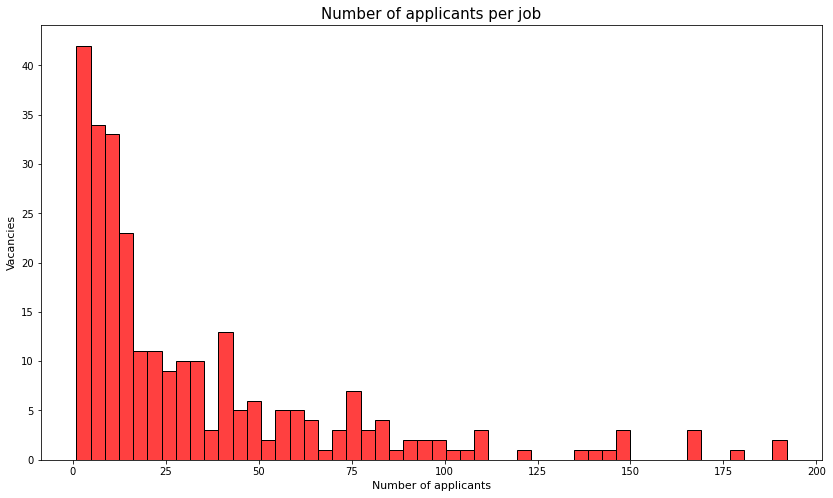

In [66]:
print(df['candidats'].describe())

plt.figure(figsize=(14, 8))

sns.histplot(data=df, x='candidats', color='red', label='jobs', bins=50)

plt.title('Number of applicants per job', loc="center", fontsize=15)
plt.ylabel('Vacancies', fontsize=11)
plt.xlabel('Number of applicants', fontsize=11);

We can see that some jobs are getting more than 100 applicants, but most of the jobs have reasonably low amount of applicants (less than 20). We also see big differrence between mean and median indicating outliers (jobs with very high number of applicants).

### Company name

Let's get the company name from `html` column:

In [67]:
def get_company(cell):
    try:
        return BeautifulSoup(cell).find('span', class_ = 'jobs-unified-top-card__company-name').text.strip()
    except:
        return np.nan

In [68]:
df['company'] = df['html'].apply(get_company)

In [69]:
df.head()

,html,title,link,city,country,candidats,company
2,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST,https://linkedin.com/jobs/view/3248499929/?alt...,Skara,Sweden,12.0,TELUS International AI Data Solutions
3,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST - BELGIUM,https://linkedin.com/jobs/view/3248879065/?alt...,West Flanders,Belgium,11.0,TELUS International
4,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3257222954/?alt...,Mecklenburg-West Pomerania,Germany,2.0,TELUS International AI Data Solutions
5,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3257228331/?alt...,Hamburg,Germany,4.0,TELUS International AI Data Solutions
6,"\n <div>\n <div class=""\n jobs-deta...",ALTERNANT/ ALTERNANTE DATA ANALYST M/F,https://linkedin.com/jobs/view/3244114599/?alt...,Rousset,France,25.0,STMicroelectronics


Let's see what are the top hiring companies:

In [70]:
df['company'].value_counts().head(5)

TELUS International AI Data Solutions    32
TELUS International                      27
Positive Thinking Company                 6
Appen                                     4
Boursorama                                4
Name: company, dtype: int64

Apparently TELUS is leading the market this week!

### Level and time

Now we are going to find the type of job:

In [71]:
def get_insight(cell):
    try:
        return BeautifulSoup(cell).find(
            'li', class_ = 'jobs-unified-top-card__job-insight').text.strip()
    except:
        return np.nan

In [72]:
df['insight'] = df['html'].apply(get_insight)

Let's see what we got here:

In [73]:
df['insight'].value_counts()

Full-time · Entry level                              206
Part-time · Entry level                               51
Contract · Entry level                                27
Full-time                                              7
Temporary · Entry level                                4
Internship · Entry level                               2
£30,000/yr - £35,000/yr · Full-time · Entry level      1
Entry level                                            1
£19,000/yr - £28,000/yr · Full-time                    1
Part-time                                              1
£25,000/yr - £27,500/yr · Contract · Entry level       1
Name: insight, dtype: int64

Most of the jobs have `Entry level` marked, we don't really need that, as we specifically found all the entry level vacancies, but we will put Full/Part time etc. in separate column:

In [74]:
def get_time(cell):
    if len(str(cell).split('·')) > 1:
        if '£19,000/yr - £28,000/yr' in cell:
            return cell.split('·')[-1].strip()
        else:
            return cell.split('·')[-2].strip()
    else:
        return np.nan

In [75]:
df['time'] = df['insight'].apply(get_time)

In [76]:
df['time'].value_counts()

Full-time     208
Part-time      51
Contract       28
Temporary       4
Internship      2
Name: time, dtype: int64

Most employers want employees for `Full-time` jobs, but `Part-time` and `Contract` are also significant.

### Type

Now let's find out if the emploeers prefer you working on site:

In [77]:
def get_w_type(cell):
    try:
        return BeautifulSoup(cell).find(
            'span', class_ = 'jobs-unified-top-card__workplace-type').text.strip()
    except:
        return np.nan

In [78]:
df['w_type'] = df['html'].apply(get_w_type)

In [79]:
df['w_type'].value_counts()

On-site    132
Remote      80
Hybrid      32
Name: w_type, dtype: int64

Yes, most of the jobs are still `On-site`, but `Remote` working is also well present.

### Company size

We will first get the field and company size together:

In [80]:
def get_field_and_size(cell):
    try:
        return BeautifulSoup(cell).find(
            'div', class_ = 'mt5 mb2').find_all('li')[1].text.strip()
    except:
        return np.nan

In [81]:
df['field_size'] = df['html'].apply(get_field_and_size)

In [82]:
df['field_size'].unique()[:10]

array(['10,001+ employees · IT Services and IT Consulting',
       '10,001+ employees · Semiconductor Manufacturing',
       '10,001+ employees · Retail',
       '10,001+ employees · Motor Vehicle Manufacturing',
       '201-500 employees · Human Resources Services',
       '10,001+ employees · Banking',
       '5,001-10,000 employees · Musicians',
       '10,001+ employees · Industrial Machinery Manufacturing',
       '1,001-5,000 employees · IT Services and IT Consulting',
       '51-200 employees · Staffing and Recruiting'], dtype=object)

Then get the company size and generalize it:

In [83]:
def get_size(cell):
    return str(cell).split('·')[0].strip()

In [84]:
df['c_size'] = df['field_size'].apply(get_size)

In [85]:
def company_size(row):
    '''
    Function returns generalized size
    of the company, based on amount of employees
    '''  
    size = row['c_size']
    
    if ('1,00' in size) or ('10,00' in size):
    #elif ('501-1,000' in size) or ('1,001-5,000' in size) or ('5,001-10,000' in size) or ('10,001+' in size):
        return 'big (500+)'
    elif ('20' in size):
        return 'middle (50-500)'
    elif ('1-10' in size) or ('11-50' in size):
        return 'small (1-50)'
    else:
        return 'other'

In [86]:
df['company_size'] = df[['c_size']].apply(company_size, axis=1)

In [87]:
df['company_size'].value_counts()

big (500+)         212
middle (50-500)     49
small (1-50)        30
other               12
Name: company_size, dtype: int64

More than half of all jobs are offered by big companies: surprise, surprise!

### Getting the field

Let's put the field in separate column:

In [88]:
def get_field(cell):
    return str(cell).split('·')[-1].strip()

In [89]:
df['field'] = df['field_size'].apply(get_field)

Let's check what we got here:

In [90]:
df['field'].unique()[:30]

array(['IT Services and IT Consulting', 'Semiconductor Manufacturing',
       'Retail', 'Motor Vehicle Manufacturing',
       'Human Resources Services', 'Banking', 'Musicians',
       'Industrial Machinery Manufacturing', 'Staffing and Recruiting',
       'Financial Services', 'Insurance', 'Food and Beverage Services',
       'Pharmaceutical Manufacturing',
       'Aviation and Aerospace Component Manufacturing',
       'Automation Machinery Manufacturing',
       'Business Consulting and Services', 'Oil and Gas',
       'Broadcast Media Production and Distribution', 'Civil Engineering',
       'Appliances, Electrical, and Electronics Manufacturing',
       'Software Development', 'Retail Luxury Goods and Jewelry',
       'Internet Marketplace Platforms', 'Utilities',
       'Advertising Services', 'Technology, Information and Internet',
       'Consumer Services', 'Artists and Writers', 'Telecommunications',
       'Hospitality'], dtype=object)

Some of the names got here by accident, so we will put NaN instead:

In [91]:
no_list_field = ['See recent hiring trends', 'employees', 'See how you compare']

In [92]:
df.loc[df['field'].str.contains('|'.join(no_list_field)), 'field'] = np.nan

In [93]:
df.head()

,html,title,link,city,country,candidats,company,insight,time,w_type,field_size,c_size,company_size,field
2,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST,https://linkedin.com/jobs/view/3248499929/?alt...,Skara,Sweden,12.0,TELUS International AI Data Solutions,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting
3,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST - BELGIUM,https://linkedin.com/jobs/view/3248879065/?alt...,West Flanders,Belgium,11.0,TELUS International,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting
4,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3257222954/?alt...,Mecklenburg-West Pomerania,Germany,2.0,TELUS International AI Data Solutions,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting
5,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3257228331/?alt...,Hamburg,Germany,4.0,TELUS International AI Data Solutions,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting
6,"\n <div>\n <div class=""\n jobs-deta...",ALTERNANT/ ALTERNANTE DATA ANALYST M/F,https://linkedin.com/jobs/view/3244114599/?alt...,Rousset,France,25.0,STMicroelectronics,Full-time · Entry level,Full-time,On-site,"10,001+ employees · Semiconductor Manufacturing","10,001+ employees",big (500+),Semiconductor Manufacturing


### Date

Let's find out the dates when the jobs were posted. First we will get the information from the code, which contains how many minutes/hours/days has passed since the moment of parsing. Knowing the date of parsing (7.09.2022) we will get the actual date of posting. 

In [94]:
def date_posted(cell):
    try:
        return BeautifulSoup(cell).find(
            'span', class_ = 'jobs-unified-top-card__posted-date').text.strip()
    except:
        return np.nan

In [95]:
df['posted_date'] = df['html'].apply(date_posted)

In [96]:
df['posted_date'].value_counts()

1 day ago         66
6 days ago        64
5 days ago        51
2 days ago        38
8 hours ago       16
4 days ago        11
9 hours ago        8
2 hours ago        7
23 hours ago       7
3 days ago         7
7 hours ago        4
21 hours ago       4
10 hours ago       3
4 hours ago        2
5 hours ago        2
22 hours ago       2
3 hours ago        1
16 hours ago       1
37 minutes ago     1
19 hours ago       1
6 hours ago        1
11 hours ago       1
13 hours ago       1
1 week ago         1
14 hours ago       1
6 minutes ago      1
18 hours ago       1
Name: posted_date, dtype: int64

We will keep the information about days only and change it's format into numeric.

In [97]:
df['posted_date'] = df['posted_date'].replace({' days ago': '', ' day ago': '', '1 week ago': '7'}, regex=True)

In [98]:
df['posted_date'] = df['posted_date'].str.replace('.* ago', '0', regex=True)

Let's check what we got here:

In [99]:
df['posted_date'].value_counts()

1    66
0    65
6    64
5    51
2    38
4    11
3     7
7     1
Name: posted_date, dtype: int64

We have 7 days of the week we parsed and one extra day with only one job - probably got there by mistake.

In [100]:
df['posted_date'] = df['posted_date'].astype(int)

In [101]:
df['posted_date'] = df['posted_date'].apply(lambda x: date(2022, 9, 7) - timedelta(days=x))

In [102]:
df['posted_date'].value_counts()

2022-09-06    66
2022-09-07    65
2022-09-01    64
2022-09-02    51
2022-09-05    38
2022-09-03    11
2022-09-04     7
2022-08-31     1
Name: posted_date, dtype: int64

We got the actual dates!

Let's delete one lonely job posted before the period we analyse:

In [103]:
df[df['posted_date'] == date(2022, 8, 31)]

,html,title,link,city,country,candidats,company,insight,time,w_type,field_size,c_size,company_size,field,posted_date
501,"\n <div>\n <div class=""\n jobs-deta...",GIS ASSET DATA ANALYST,https://linkedin.com/jobs/view/3245566414/?alt...,Coventry,United Kingdom,3.0,Halo Resourcing | MK's Local Recruitment Agency,Full-time · Entry level,Full-time,On-site,1-10 employees · Staffing and Recruiting,1-10 employees,small (1-50),Staffing and Recruiting,2022-08-31


In [104]:
df.drop(index=(501), axis=0, inplace=True)

### Description

Let's get full job description:

In [105]:
def get_description(df):
  soup = BeautifulSoup(df, 'lxml')
  desc_all = soup.find_all('article', class_='jobs-description__container m4')
  for desc in desc_all:
    element = desc.get_text().strip().replace('\n', ' ')
    #element = re.sub('[^a-zA-Z0-9 \n\.]', '', element)
    element = element.replace("\'", " ")
    element = element.replace('  ', ' ')
    return element

In [106]:
df['description'] = df['html'].apply(lambda x: get_description(x))

In [107]:
df.head(5)

,html,title,link,city,country,candidats,company,insight,time,w_type,field_size,c_size,company_size,field,posted_date,description
2,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST,https://linkedin.com/jobs/view/3248499929/?alt...,Skara,Sweden,12.0,TELUS International AI Data Solutions,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting,2022-09-01,TELUS International AI-Data Solutions partners...
3,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST - BELGIUM,https://linkedin.com/jobs/view/3248879065/?alt...,West Flanders,Belgium,11.0,TELUS International,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting,2022-09-01,TELUS International AI-Data Solutions partners...
4,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3257222954/?alt...,Mecklenburg-West Pomerania,Germany,2.0,TELUS International AI Data Solutions,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting,2022-09-07,TELUS International AI-Data Solutions partners...
5,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3257228331/?alt...,Hamburg,Germany,4.0,TELUS International AI Data Solutions,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting,2022-09-07,TELUS International AI-Data Solutions partners...
6,"\n <div>\n <div class=""\n jobs-deta...",ALTERNANT/ ALTERNANTE DATA ANALYST M/F,https://linkedin.com/jobs/view/3244114599/?alt...,Rousset,France,25.0,STMicroelectronics,Full-time · Entry level,Full-time,On-site,"10,001+ employees · Semiconductor Manufacturing","10,001+ employees",big (500+),Semiconductor Manufacturing,2022-09-02,"POURQUOI NOUS REJOINDRE Au sein de ST, nous so..."


Ready!

### Skills

Now let's find the skills required for the job:

In [108]:
skills = (['datahub', 'api', 'github', 'google analytics', 'adobe analytics', 'ibm coremetrics', 'omniture'
            'gitlab', 'erwin', 'hadoop', 'spark', 'hive'
           'databricks', 'aws', 'gcp', 'azure','excel',
            'redshift', 'bigquery', 'snowflake',  'hana'
            'grafana', 'kantar', 'spss', 'a/b testing', 'ab testing',
           'asana', 'basecamp', 'jira', 'dbeaver','trello', 'miro', 'salesforce', 
           'rapidminer', 'thoughtspot',  'power point',  'docker', 'jenkins','integrate.io', 'talend', 'apache nifi','aws glue','pentaho','google data flow',
             'azure data factory','xplenty','skyvia','iri voracity','xtract.io','dataddo', 'ssis',
             'hevo data','informatica','oracle data integrator','k2view','cdata sync','querysurge', 
             'rivery', 'dbconvert', 'alooma', 'stitch', 'fivetran', 'matillion','streamsets','blendo',
             'iri voracity','logstash', 'etleap', 'singer', 'apache camel','actian', 'airflow', 'luidgi', 'datastage',
           'python', 'vba', 'scala', ' r ', 'java script', 'julia', 'sql', 'matlab', 'java', 'html', 'c++', 'sas',
           'data studio', 'tableau', 'looker', 'powerbi', 'cognos', 'microstrategy', 'spotfire',
             'sap business objects','microsoft sql server', 'oracle business intelligence', 'yellowfin',
             'webfocus','sas visual analytics', 'targit', 'izenda',  'sisense', 'statsbot', 'panorama', 'inetsoft',
             'birst', 'domo', 'metabase', 'redash', 'power bi', 'alteryx', 'dataiku', 'qlik sense', 'qlikview'
          ]) 

In [109]:
def get_skills(cell):
    list_skills = []
    for skill in skills:
        if skill in cell.lower().replace('powerbi', 'power bi'):
            list_skills.append(skill)
    return list_skills

In [110]:
df['skills'] = df.description.apply(get_skills)

In [111]:
df.head()

,html,title,link,city,country,candidats,company,insight,time,w_type,field_size,c_size,company_size,field,posted_date,description,skills
2,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST,https://linkedin.com/jobs/view/3248499929/?alt...,Skara,Sweden,12.0,TELUS International AI Data Solutions,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting,2022-09-01,TELUS International AI-Data Solutions partners...,[]
3,"\n <div>\n <div class=""\n jobs-deta...",ONLINE DATA ANALYST - BELGIUM,https://linkedin.com/jobs/view/3248879065/?alt...,West Flanders,Belgium,11.0,TELUS International,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting,2022-09-01,TELUS International AI-Data Solutions partners...,[]
4,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3257222954/?alt...,Mecklenburg-West Pomerania,Germany,2.0,TELUS International AI Data Solutions,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting,2022-09-07,TELUS International AI-Data Solutions partners...,[]
5,"\n <div>\n <div class=""\n jobs-deta...",DATA ANALYST,https://linkedin.com/jobs/view/3257228331/?alt...,Hamburg,Germany,4.0,TELUS International AI Data Solutions,Part-time · Entry level,Part-time,Remote,"10,001+ employees · IT Services and IT Consulting","10,001+ employees",big (500+),IT Services and IT Consulting,2022-09-07,TELUS International AI-Data Solutions partners...,[]
6,"\n <div>\n <div class=""\n jobs-deta...",ALTERNANT/ ALTERNANTE DATA ANALYST M/F,https://linkedin.com/jobs/view/3244114599/?alt...,Rousset,France,25.0,STMicroelectronics,Full-time · Entry level,Full-time,On-site,"10,001+ employees · Semiconductor Manufacturing","10,001+ employees",big (500+),Semiconductor Manufacturing,2022-09-02,"POURQUOI NOUS REJOINDRE Au sein de ST, nous so...","[excel, python, sql, java, html, spotfire, pow..."


The data looks pretty full to me, let's check for duplicates.

In [112]:
df.duplicated(subset=['html']).sum()

0

### Preparation for visualisation

Let's create a new dataframe and export it to csv to be able to work in Tableau:

In [113]:
df_vis = df[['title', 'link', 
             'city', 'country',
             'w_type', 'time',
             'company','field', 'company_size',
             'posted_date', 'candidats',
             'description', 'skills']]

In [114]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 2 to 763
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         302 non-null    object 
 1   link          302 non-null    object 
 2   city          283 non-null    object 
 3   country       302 non-null    object 
 4   w_type        243 non-null    object 
 5   time          292 non-null    object 
 6   company       302 non-null    object 
 7   field         284 non-null    object 
 8   company_size  302 non-null    object 
 9   posted_date   302 non-null    object 
 10  candidats     268 non-null    float64
 11  description   302 non-null    object 
 12  skills        302 non-null    object 
dtypes: float64(1), object(12)
memory usage: 33.0+ KB


Let's check again what are the cases where the city is not defined:

In [115]:
df_vis[df_vis['city'].isna()]['w_type'].value_counts()

Remote    18
Name: w_type, dtype: int64

Turns out these are the Remote jobs - makes sense.

Before exporting the file we will explode it by `skills` column to see which of the skills are most wanted for Data Analyst candidates:

In [116]:
df_vis = df_vis.explode('skills')

### Export of csv file

In [117]:
df_vis.to_csv('linkedin_for_vis.csv', index = False)

<div style="border:solid grey 1.5px">

**Here we are!**